ELDEN RING WEAPONS STATS EDA

INTRODUCTION:
Elden Ring is a brand new product of FromSoftware with the guidance of Hidetaka Miyazaki and George Marin, the author of the famous fantasy series "A Song of Fire and Ice." As following the series of Soul-style, Elden Ring is an action game with an exciting open-world adventure. It has passed 12 million sales in just the first three weeks and has become one of the best games on many review pages.

THE GOAL:
There are around 300 weapons we can get in the game. With the database, we aim to analyze the Attack,Guard, and Scaling attributes.

Let's setup:

In [15]:
# Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

import warnings
warnings.filterwarnings('ignore')


In [16]:
# Setup figure
sns.set_style('whitegrid')
clmap = 'flare'

In [30]:
# Functions:
def lst_unique(list1,srt = False):
    list_set = set(list1)
    unique_list = (list(list_set))
    if srt:
        unique_list.sort()
    return unique_list
def Convert(lst):
    res_dct = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return res_dct
def infoOut(data,details=False,vunique=False,srt=False):
    dfInfo = data.columns.to_frame(name='Column')
    dfInfo['Non-Null Count'] = data.notna().sum()
    dfInfo['Is-Null Count'] = data.isnull().sum()
    dfInfo['Dtype'] = data.dtypes
    dfInfo.reset_index(drop=True,inplace=True)
    if vunique:
        dfInfo['Unique'] = np.nan
        Unique_col = dfInfo.columns.get_loc('Unique')
        for i in range(0,len(data.columns)):
            Va_unique = lst_unique(data.T.values[i],srt)
            Va_listToStr = ' '.join([str(elem) for elem in Va_unique])
            dfInfo.iloc[i,Unique_col] = Va_listToStr
    if details:
        rangeIndex = (dfInfo['Non-Null Count'].min(),dfInfo['Non-Null Count'].min())
        totalColumns = dfInfo['Column'].count()
        dtypesCount = dfInfo['Dtype'].value_counts()
        totalMemory = dfInfo.memory_usage().sum()
        return dfInfo, rangeIndex, totalColumns, dtypesCount, totalMemory
    else:
        return dfInfo
def show_values_on_bars(axs, h_v="v", space=0.4):
    '''Plots the value at the end of the a seaborn barplot.
    axs: the ax of the plot
    h_v: weather or not the barplot is vertical/ horizontal'''
    
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, format(value, ','), ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, format(value, ','), ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [21]:
# Import data
df = pd.read_csv('elden_ring_weapon.csv')

First look:

In [29]:
df.columns = df.columns.str.replace('.1','_Guard')
cl = df.columns
print('Data: ----------------------------------------------------------------\n')
display(df.head(5))
print('Index: ----------------------------------------------------------------\n')
display(cl)
print('Data Info: ----------------------------------------------------------------\n')
display(infoOut(df,vunique=True,srt=True))

Data: ----------------------------------------------------------------



,Name,Type,Phy,Mag,Fir,Lit,Hol,Cri,Sta,Str,...,Any,Phy_Guard,Mag_Guard,Fir_Guard,Lit_Guard,Hol_Guard,Bst,Rst,Wgt,Upgrade
0,Academy Glintstone Staff,Glintstone Staff,43,-,-,-,-,100,40,D,...,-,25,15,15,15,15,15,10,3.0,Smithing Stones
1,Alabaster Lord's Sword,Greatsword,313,93,-,-,-,100,126,B,...,-,56,33,27,27,27,39,19,8.0,Somber Smithing Stones
2,Albinauric Bow,Bow,200,-,-,-,-,100,60,E,...,-,-,-,-,-,-,-,-,4.5,Smithing Stones
3,Albinauric Staff,Glintstone Staff,29,-,-,-,-,100,38,D,...,-,23,14,14,14,14,14,9,2.5,Smithing Stones
4,Antspur Rapier,Thrusting Sword,240,-,-,-,-,100,62,D,...,(55),47,31,31,31,31,25,10,3.0,Smithing Stones


Index: ----------------------------------------------------------------



Index(['Name', 'Type', 'Phy', 'Mag', 'Fir', 'Lit', 'Hol', 'Cri', 'Sta', 'Str',
       'Dex', 'Int', 'Fai', 'Arc', 'Any', 'Phy_Guard', 'Mag_Guard',
       'Fir_Guard', 'Lit_Guard', 'Hol_Guard', 'Bst', 'Rst', 'Wgt', 'Upgrade'],
      dtype='object')

Data Info: ----------------------------------------------------------------



,Column,Non-Null Count,Is-Null Count,Dtype,Unique
0,Name,307,0,object,Academy Glintstone Staff Alabaster Lord's Swor...
1,Type,307,0,object,Axe Ballista Bow Claw Colossal Sword Colossal ...
2,Phy,307,0,object,- 102 112 122 124 132 137 139 142 146 147 149 ...
3,Mag,307,0,object,- 129 137 139 147 149 156 161 166 173 175 176 ...
4,Fir,307,0,object,- 110 129 137 139 151 161 169 176 181 186 188 ...
5,Lit,307,0,object,- 129 144 154 191
6,Hol,307,0,object,- 105 122 151 159 161 166 169 178 183 186 188 ...
7,Cri,307,0,int64,100 110 115 124 130 140
8,Sta,307,0,int64,38 40 42 46 56 60 62 64 66 68 72 76 78 80 82 8...
9,Str,307,0,object,- A B C D E S


'Axe Ballista Bow Claw Colossal Sword Colossal Weapon Crossbow Curved Greatsword Curved Sword Dagger Fist Flail Glintstone Staff Great Spear Greataxe Greatbow Greatsword Halberd Hammer Heavy Thrusting Sword Katana Light Bow Reaper Sacred Seal Spear Straight Sword Thrusting Sword Torch Twinblade Warhammer Whip'

Percentage of null: ----------------------------------


,Name,Percent
0,Name,0.000000
1,Type,0.000000
2,Phy,0.651466
3,Mag,87.947883
4,Fir,93.159609
5,Lit,98.697068
6,Hol,89.576547
7,Cri,0.000000
8,Sta,0.000000
9,Str,5.211726


Heatmap of null: ----------------------------------


Text(0.5, 1.0, 'Heatmap of null values')

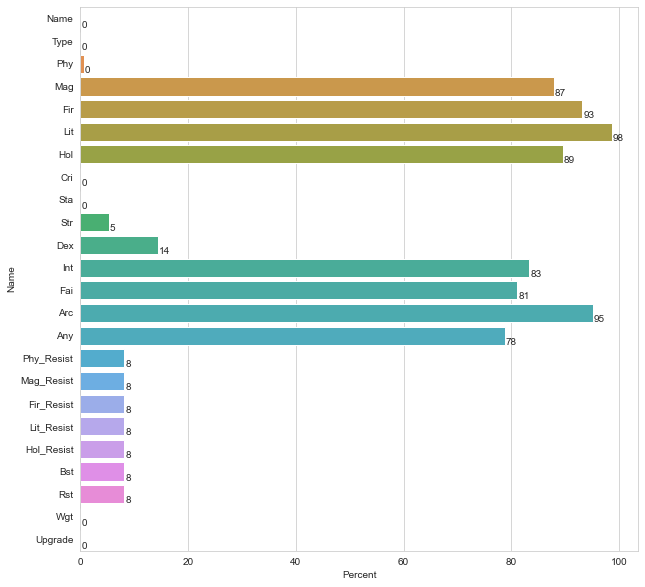

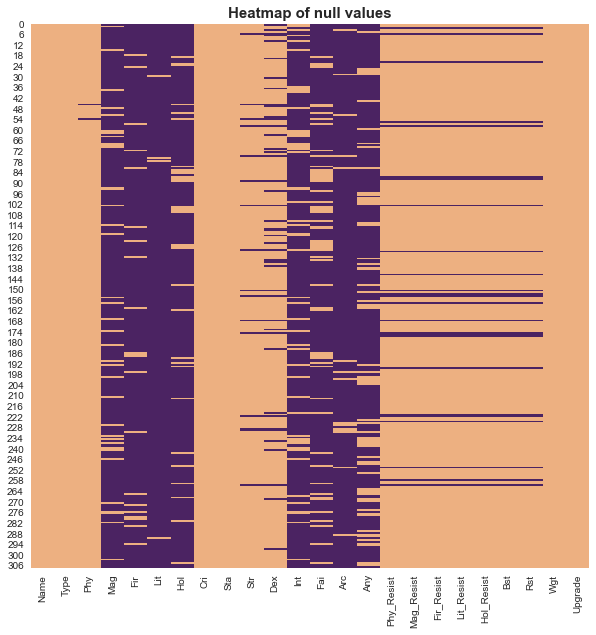

In [14]:
for col in df.columns:
    df[col].replace({'-':np.nan},inplace=True)
print('Percentage of null: ----------------------------------')
null_per = df.isnull().sum()*100/len(df)
null_per = null_per.to_frame()
null_per.columns = ['Percent']
null_per.index.names = ['Name']
null_per.reset_index(inplace=True)
display(null_per)
fig,ax = plt.subplots(figsize=(10,10))
sns.barplot(x='Percent',y='Name',data=null_per)
show_values_on_bars(axs=ax,h_v='h',space = 0.2)
print('Heatmap of null: ----------------------------------')
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False,cmap=clmap)
plt.title('Heatmap of null values',fontsize=15,fontweight='bold')

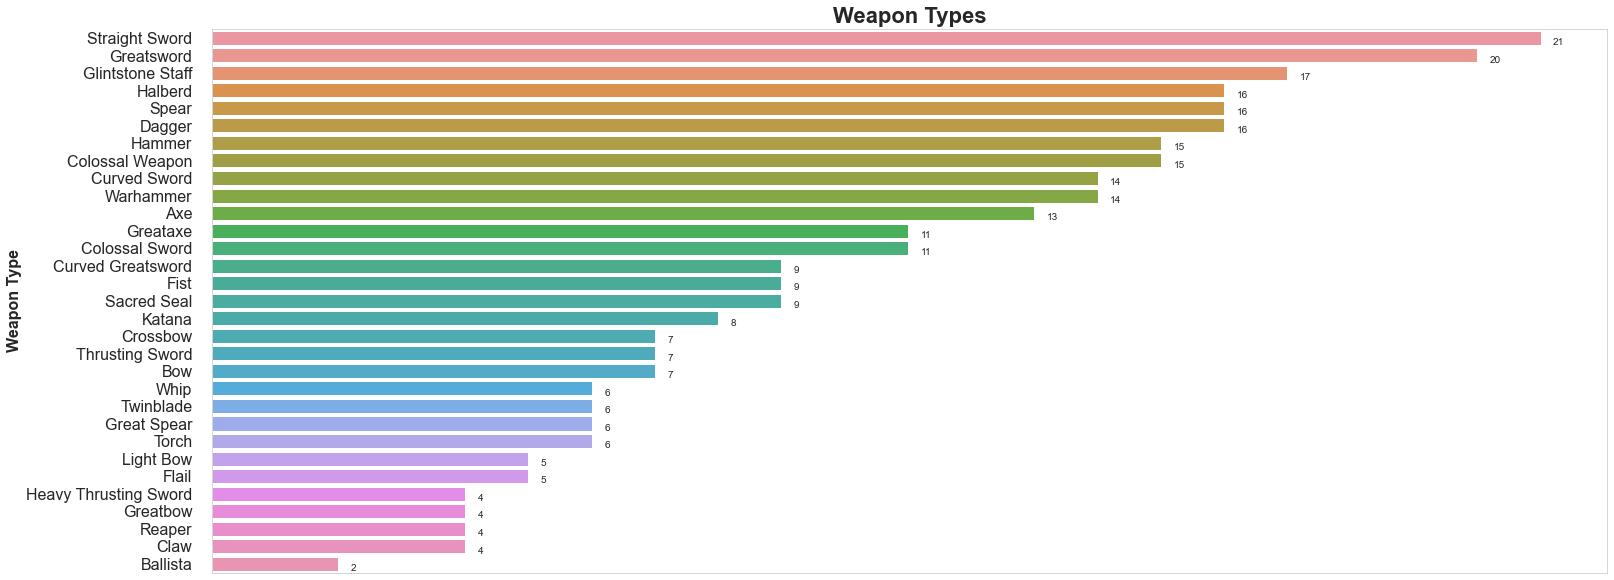

In [26]:
# Plot Weapon Types
fig,ax = plt.subplots(figsize = (25,10))
plt.title("Weapon Types",size = 22,weight = 'bold')

sns.barplot(data = df['Type'].value_counts().reset_index(),x = 'Type',y='index')
sns.set_style("whitegrid")
plt.ylabel("Weapon Type", size = 16, weight="bold")
plt.xlabel("")
plt.xticks([])
plt.yticks(size=16)
plt.tick_params(size=16)
show_values_on_bars(axs=ax,h_v='h',space = 0.2)

In [15]:
df[df['Phy'].isnull()]

,Name,Type,Phy,Mag,Fir,Lit,Hol,Cri,Sta,Str,...,Any,Phy_Resist,Mag_Resist,Fir_Resist,Lit_Resist,Hol_Resist,Bst,Rst,Wgt,Upgrade
45,Cipher Pata,Fist,NaN,NaN,NaN,NaN,208,100,90,NaN,...,NaN,9,14,14,14,61,19,9,0.0,Somber Smithing Stones
53,Coded Sword,Straight Sword,NaN,NaN,NaN,NaN,208,100,76,NaN,...,NaN,13,22,22,22,58,27,13,2.5,Somber Smithing Stones


In [16]:
cols = ['Phy', 'Mag', 'Fir', 'Lit', 'Hol', 'Cri', 'Sta','Phy_Resist', 'Mag_Resist',
       'Fir_Resist', 'Lit_Resist', 'Hol_Resist', 'Bst', 'Rst']
for col in cols:
        df[col].fillna(0,inplace=True)

In [17]:
for col in cols:
    df[col] = df[col].astype('str').astype('int')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        307 non-null    object 
 1   Type        307 non-null    object 
 2   Phy         307 non-null    int32  
 3   Mag         307 non-null    int32  
 4   Fir         307 non-null    int32  
 5   Lit         307 non-null    int32  
 6   Hol         307 non-null    int32  
 7   Cri         307 non-null    int32  
 8   Sta         307 non-null    int32  
 9   Str         291 non-null    object 
 10  Dex         263 non-null    object 
 11  Int         51 non-null     object 
 12  Fai         58 non-null     object 
 13  Arc         15 non-null     object 
 14  Any         65 non-null     object 
 15  Phy_Resist  307 non-null    int32  
 16  Mag_Resist  307 non-null    int32  
 17  Fir_Resist  307 non-null    int32  
 18  Lit_Resist  307 non-null    int32  
 19  Hol_Resist  307 non-null    i

None

<AxesSubplot:>

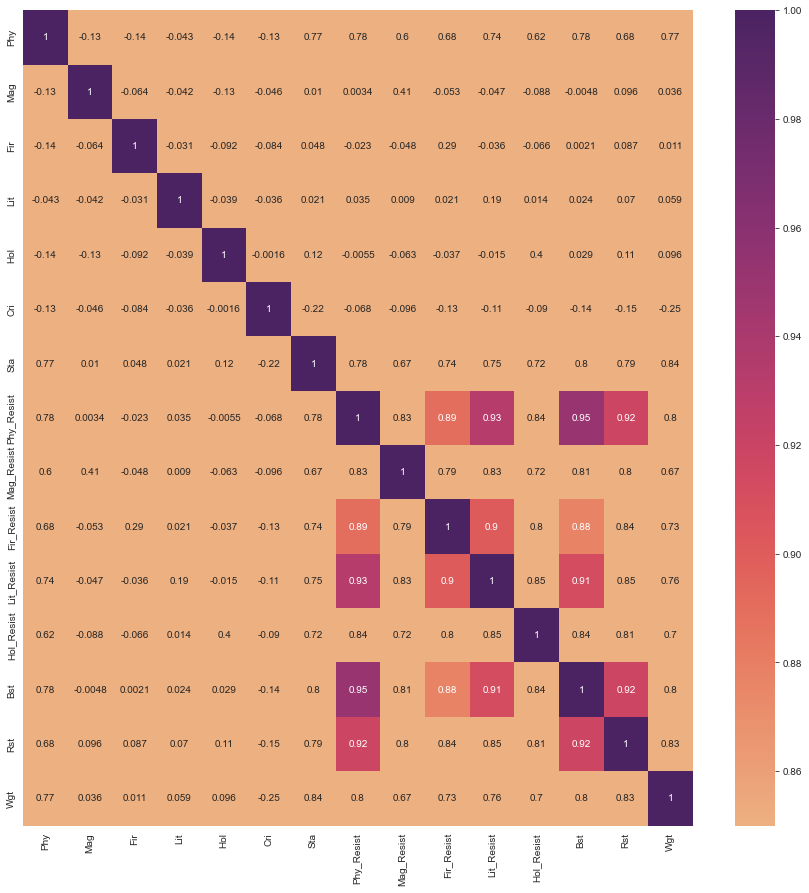

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(method='spearman'),cbar=True,cmap=clmap,annot=True,vmin=0.85,vmax=1)

<AxesSubplot:title={'center':'Twinblade'}>

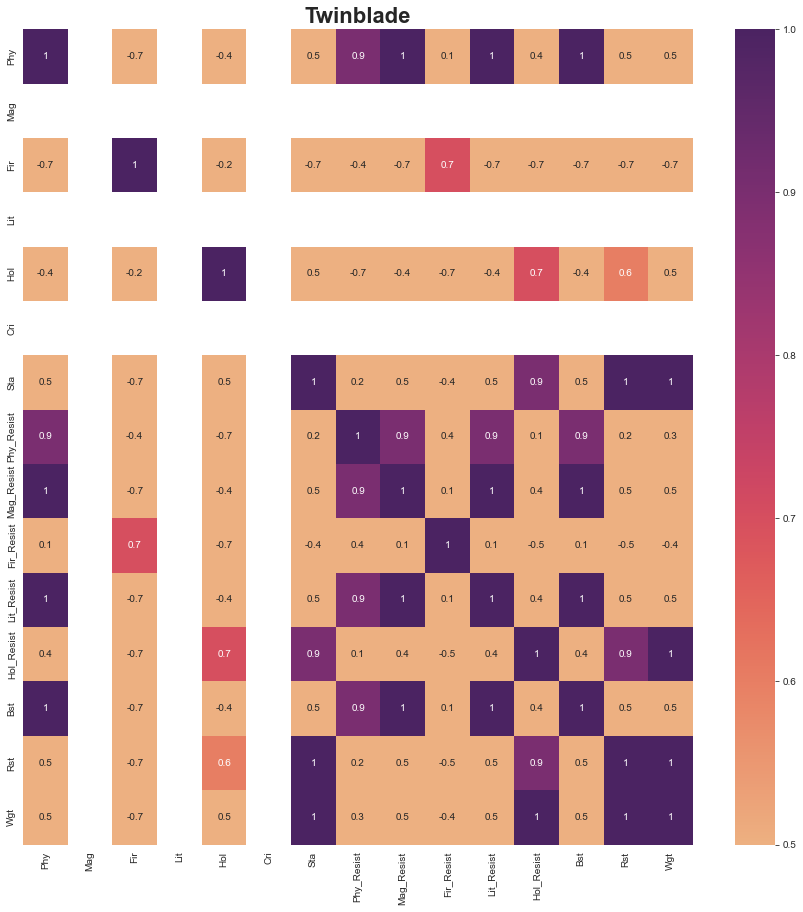

In [18]:
fig,ax = plt.subplots(figsize = (15,15))
plt.title("Twinblade",size = 22,weight = 'bold')
da = df[df['Type']=='Twinblade'].iloc[:,:]
sns.heatmap(da.corr(method='spearman').round(1),cbar=True,cmap=clmap,annot=True,vmin=0.5,vmax=1)